# PEC 3 




## Parte 1 : RDF y RDFS


En este notebook vamos a utilizar algunas librerías python útiles para trabajar con tripletas:

*   `rdflib` para trabajar con tripletas RDF
*   `rdflib-jsonld` para usar JSON-LD
*   `SPARQLWrapper` para ejecutar consultas SPARQL e importar los resultados en el notebook
*   `pydotplus` y `graphviz` para visualizar los grafos.



In [1]:
! pip install rdflib
! pip install rdflib-jsonld
! pip install -q sparqlwrapper  
! pip install pydotplus
! pip install graphviz

You should consider upgrading via the 'C:\Users\aland\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\aland\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.
You should consider upgrading via the 'C:\Users\aland\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\aland\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\aland\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [8]:
pip install graphviz


You should consider upgrading via the 'C:\Users\aland\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [17]:
pip install networkx

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\aland\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [1]:
import io
from rdflib import Graph as RDFGraph
from rdflib import Namespace, URIRef, Literal, BNode
from rdflib.namespace import NamespaceManager
from rdflib.namespace import CSVW, DC, DCAT, DCTERMS, DOAP, FOAF, ODRL2, ORG, OWL, \
                           PROF, PROV, RDF, RDFS, SDO, SH, SKOS, SOSA, SSN, TIME, \
                           VOID, XMLNS, XSD
from rdflib.extras.external_graph_libs import rdflib_to_networkx_graph
import rdflib_jsonld
from SPARQLWrapper import SPARQLWrapper, JSON, XML, N3, RDF , POST, GET, POSTDIRECTLY, CSV

import pydotplus
from IPython.display import display, Image
from rdflib.tools.rdf2dot import rdf2dot

import networkx as nx
from networkx import Graph as NXGraph
import matplotlib.pyplot as plt
import pprint
import statistics
import collections
import warnings
warnings.filterwarnings ("ignore")

C:\Users\aland\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\rdflib_jsonld\__init__.py:9: DeprecationWarning: The rdflib-jsonld package has been integrated into rdflib as of rdflib==6.0.1.  Please remove rdflib-jsonld from your project's dependencies.
  warnings.warn(



Las funciones de la librería `rdflib` permiten convertir los datos en un grafo `RDFGraph` con el que cargar los datos.



In [4]:
demo = '''\
<http://bigasterisk.com/foaf.rdf#drewp> <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://xmlns.com/foaf/0.1/Person> .
<http://bigasterisk.com/foaf.rdf#drewp> <http://example.com/says>  "Hello world" .
'''

g = RDFGraph()  # crear objeto grafo en el que cargar datos
g.parse( data=demo, format ="n3") # carga los datos demo

print(len(g)) # ver cuántas tripletas : 2

for stmt in g:
    pprint.pprint(stmt)   # imprimir las tripletas



2
(rdflib.term.URIRef('http://bigasterisk.com/foaf.rdf#drewp'),
 rdflib.term.URIRef('http://example.com/says'),
 rdflib.term.Literal('Hello world'))
(rdflib.term.URIRef('http://bigasterisk.com/foaf.rdf#drewp'),
 rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#type'),
 rdflib.term.URIRef('http://xmlns.com/foaf/0.1/Person'))


Es posible extraer los datos usando las [funciones incluidas](https://rdflib.readthedocs.io/en/stable/) en el paquete `rdflib`:




In [5]:
for h, r, t in g.triples((None,None,None)):
  print( " %s  -- %s --> %s  "  % (h, r ,t) )

print  ()
print ("Sujetos")
print ("----------")
for p in g.subjects():
  print (p)

print ("Predicados")
print ("----------")
for p in g.predicates():
  print (p)

print ("Objetos")
print ("----------")
for p in g.objects():
  print (p)

 http://bigasterisk.com/foaf.rdf#drewp  -- http://example.com/says --> Hello world  
 http://bigasterisk.com/foaf.rdf#drewp  -- http://www.w3.org/1999/02/22-rdf-syntax-ns#type --> http://xmlns.com/foaf/0.1/Person  

Sujetos
----------
http://bigasterisk.com/foaf.rdf#drewp
http://bigasterisk.com/foaf.rdf#drewp
Predicados
----------
http://example.com/says
http://www.w3.org/1999/02/22-rdf-syntax-ns#type
Objetos
----------
Hello world
http://xmlns.com/foaf/0.1/Person


También es posible  consultar las tripletas almacenadas en un grafo mediante consultas SPARQL.

In [6]:
q ='''
    SELECT ?h ?r ?t
     WHERE {
        ?h ?r ?t 
     }
'''

result = g.query (q)

for row in result:
    pprint.pprint(row)   # imprimir las tripletas


(rdflib.term.URIRef('http://bigasterisk.com/foaf.rdf#drewp'),
 rdflib.term.URIRef('http://example.com/says'),
 rdflib.term.Literal('Hello world'))
(rdflib.term.URIRef('http://bigasterisk.com/foaf.rdf#drewp'),
 rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#type'),
 rdflib.term.URIRef('http://xmlns.com/foaf/0.1/Person'))


Aunque resulta a veces útil representarlas como grafos.


(dot.exe:15500): Pango-WARNING **: couldn't load font "DejaVu Sans Bold Not-Rotated 14", falling back to "Sans Bold Not-Rotated 14", expect ugly output.

(dot.exe:15500): Pango-WARNING **: couldn't load font "DejaVu Sans Not-Rotated 10", falling back to "Sans Not-Rotated 10", expect ugly output.

(dot.exe:15500): Pango-WARNING **: couldn't load font "DejaVu Sans Not-Rotated 14", falling back to "Sans Not-Rotated 14", expect ugly output.



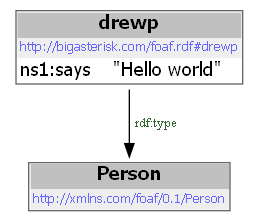

In [9]:
def visualize(g):
    stream = io.StringIO()
    rdf2dot(g, stream, opts = {display})
    dg = pydotplus.graph_from_dot_data(stream.getvalue())
    png = dg.create_png()
    display(Image(png))


visualize(g)

Con el grafo es posible obtener cualquiera de los otros formatos RDF  con la función `serialize`.

In [6]:
target_pretty = g.serialize ( format="pretty-xml")
print ( target_pretty )

<?xml version="1.0" encoding="utf-8"?>
<rdf:RDF
  xmlns:ns3="http://xmlns.com/foaf/0.1/"
  xmlns:ns1="http://example.com/"
  xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#"
>
  <ns3:Person rdf:about="http://bigasterisk.com/foaf.rdf#drewp">
    <ns1:says>Hello world</ns1:says>
  </ns3:Person>
</rdf:RDF>



Con *RDF Schema* se pueden especificar clases y jerarquías.


(dot.exe:2116): Pango-WARNING **: couldn't load font "DejaVu Sans Bold Not-Rotated 14", falling back to "Sans Bold Not-Rotated 14", expect ugly output.

(dot.exe:2116): Pango-WARNING **: couldn't load font "DejaVu Sans Not-Rotated 10", falling back to "Sans Not-Rotated 10", expect ugly output.



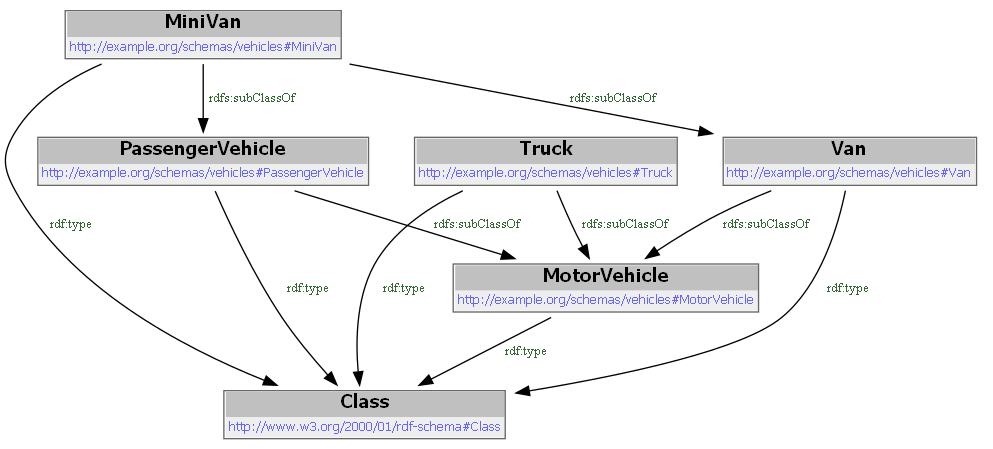

In [10]:
vehicles_data = """\
@prefix ex: <http://example.org/schemas/vehicles#> .
@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
ex:MotorVehicle       rdf:type          rdfs:Class .
ex:PassengerVehicle   rdf:type          rdfs:Class .
ex:Van                rdf:type          rdfs:Class .
ex:Truck              rdf:type          rdfs:Class .
ex:MiniVan            rdf:type          rdfs:Class .

ex:PassengerVehicle   rdfs:subClassOf   ex:MotorVehicle .
ex:Van                rdfs:subClassOf   ex:MotorVehicle .
ex:Truck              rdfs:subClassOf   ex:MotorVehicle .

ex:MiniVan            rdfs:subClassOf   ex:Van .
ex:MiniVan            rdfs:subClassOf   ex:PassengerVehicle .
"""

veh_g = RDFGraph()
veh_g.parse (data=vehicles_data, format="n3")
visualize ( veh_g )

Como `rdfs:SubClass` es transitiva y reflexiva, es posible deducir hechos que no están directamente explicitados en las tripletas originales. Si hacemos una consulta para seleccionar los vehículos de motor con SPARQL:

In [28]:
result = veh_g.query("""
SELECT DISTINCT ?s
WHERE
{
  ?s ?p ?o .
  ?s rdfs:subClassOf+ ex:MotorVehicle .
}
""", initNs={ 'rdfs': RDFS, 'rdf' : RDF, 'ex' : 'http://example.org/schemas/vehicles#' })

for row in result:
  print (row)

(rdflib.term.URIRef('http://example.org/schemas/vehicles#PassengerVehicle'),)
(rdflib.term.URIRef('http://example.org/schemas/vehicles#MiniVan'),)
(rdflib.term.URIRef('http://example.org/schemas/vehicles#Van'),)
(rdflib.term.URIRef('http://example.org/schemas/vehicles#Truck'),)


Advertir que tanto `MiniVan` se muestra como `MotorVehicle` aunque no hay una tripleta que lo indique explícitamente (transitivamente a través de `PassengerVehicle`). 

### EJERCICIO



Vamos a trabajar con las siguientes tripletas. Completar las elementos de las tripletas que faltan para obtener un grafo consistente sobre películas, actores y directores.



(dot.exe:17484): Pango-WARNING **: couldn't load font "DejaVu Sans Bold Not-Rotated 14", falling back to "Sans Bold Not-Rotated 14", expect ugly output.

(dot.exe:17484): Pango-WARNING **: couldn't load font "DejaVu Sans Not-Rotated 10", falling back to "Sans Not-Rotated 10", expect ugly output.

(dot.exe:17484): Pango-WARNING **: couldn't load font "DejaVu Sans Not-Rotated 14", falling back to "Sans Not-Rotated 14", expect ugly output.



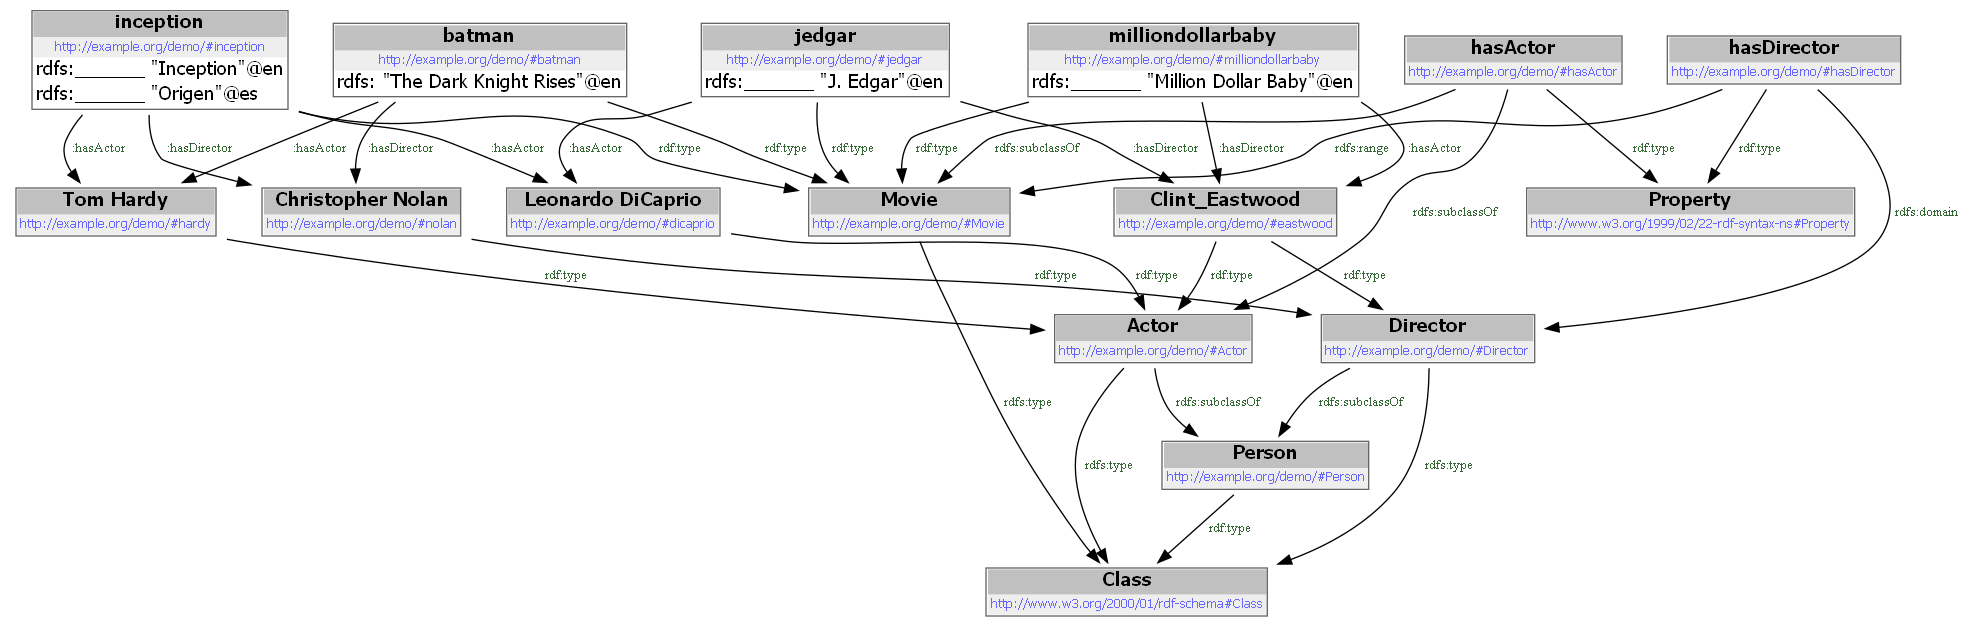

In [17]:
prefixes = """\
@prefix :	<http://example.org/demo/#> .
@prefix rdf:	<http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix rdfs:	<http://www.w3.org/2000/01/rdf-schema#> .
@prefix foaf: <http://xmlns.com/foaf/0.1/> .

"""

data = """\
:Person rdf:type rdfs:Class. # TODO 

:Actor rdfs:type rdfs:Class;
       rdfs:subclassOf :Person . # TODO 

:Director rdfs:type rdfs:Class;
          rdfs:subclassOf  :Person . # TODO 

:Movie rdfs:type rdfs:Class . # TODO 

:hasActor rdf:type  rdf:Property;   # TODO 
             rdfs:subclassOf :Movie;    # TODO 
             rdfs:subclassOf :Actor .  # TODO 

:hasDirector rdf:type rdf:Property;  # TODO 
             rdfs:range :Movie;      # TODO rdfs:_______ :___________
             rdfs:domain :Director . # TODO rdfs:_______ :___________

:nolan rdf:type :Director;             #TODO rdf:_______
       rdfs:label "Christopher Nolan". 

:dicaprio rdf:type :Actor;              #TODO 
         rdfs:label "Leonardo DiCaprio".      #TODO 

:hardy rdf:type :Actor;        #TODO 
         rdfs:label "Tom Hardy".     #TODO 

:inception  rdf:type :Movie;         #TODO 
            rdfs:_______ "Inception"@en;    #TODO 
            rdfs:_______ "Origen"@es;       #TODO 
            :hasActor :dicaprio;          #TODO 
            :hasDirector :nolan;          #TODO 
            :hasActor :hardy .           #TODO 


:eastwood   rdf:type :Director;          #TODO 
            rdf:type :Actor;             #TODO 
            rdfs:label "Clint_Eastwood". 


:milliondollarbaby  rdf:type :Movie;                   #TODO 
                    rdfs:_______ "Million Dollar Baby"@en;    #TODO 
                    :hasDirector :eastwood;                       #TODO  
                    :hasActor  :eastwood .                     #TODO 


:jedgar rdf:type :Movie;             #TODO  
        rdfs:_______ "J. Edgar"@en;    #TODO 
        :hasDirector :eastwood;            #TODO  
        :hasActor :dicaprio .           #TODO  

:batman  rdf:type  :Movie;                   #TODO 
         rdfs: "The Dark Knight Rises"@en;  #TODO 
         :hasDirector      :nolan;                     #TODO  
         :hasActor  :hardy .                        #TODO  

"""


gx = RDFGraph()

gx.parse( data=prefixes+data, format ="n3") # TODO 



In [18]:
# TODO: Cuántas tripletas hay en el grafo
print(len(gx))


39



(dot.exe:31084): Pango-WARNING **: couldn't load font "DejaVu Sans Bold Not-Rotated 14", falling back to "Sans Bold Not-Rotated 14", expect ugly output.

(dot.exe:31084): Pango-WARNING **: couldn't load font "DejaVu Sans Not-Rotated 10", falling back to "Sans Not-Rotated 10", expect ugly output.

(dot.exe:31084): Pango-WARNING **: couldn't load font "DejaVu Sans Not-Rotated 14", falling back to "Sans Not-Rotated 14", expect ugly output.



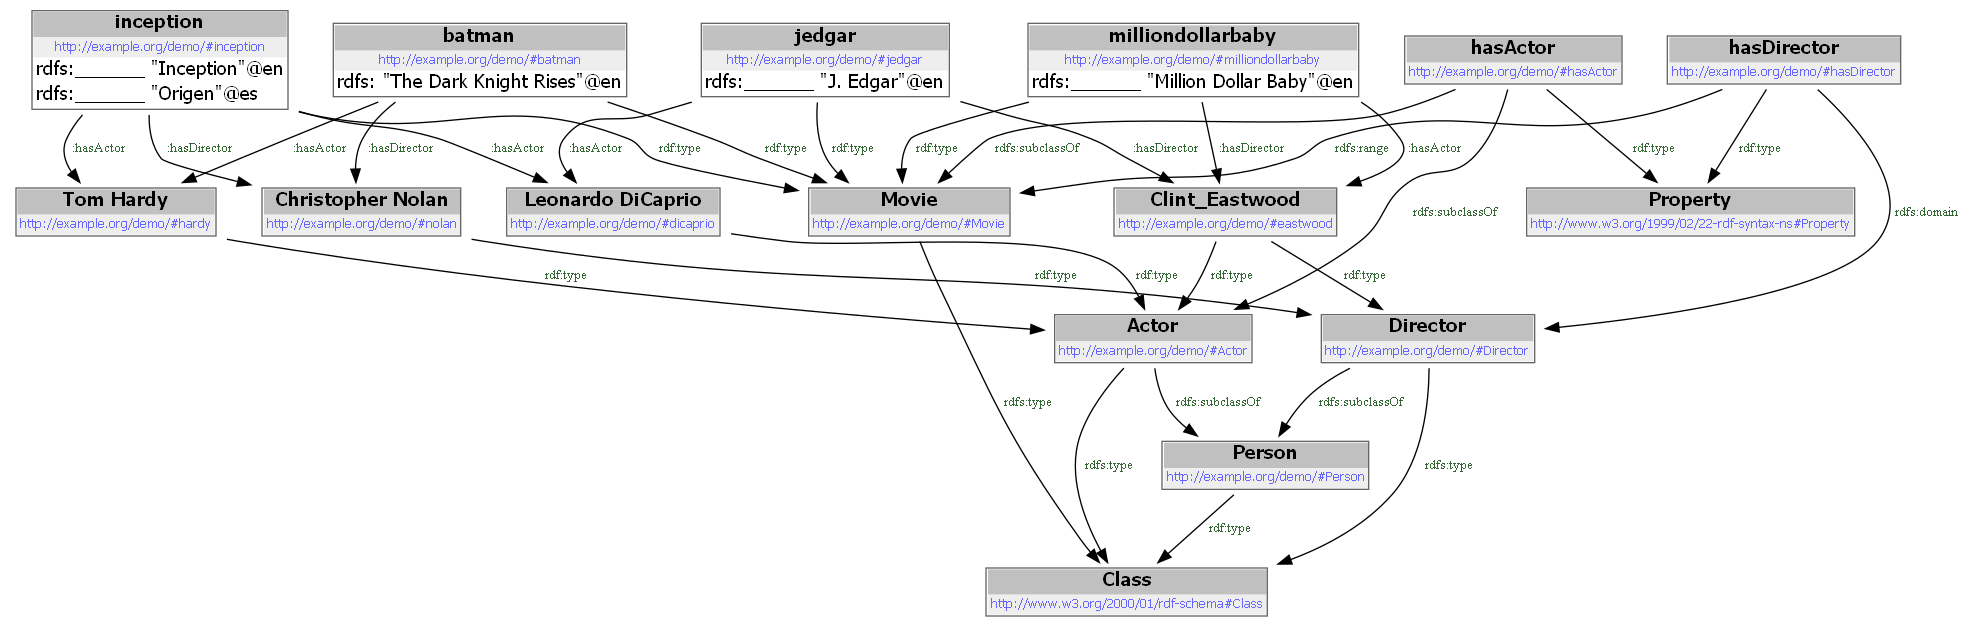

In [19]:
# TODO: visualizar el grafo
visualize(gx)


Serializar el grafo obtenido como documento JSON-LD:

In [12]:
# TODO

**Q1 - Realizar una consulta SPARQL que resuelva en cuántas películas ha participado Tom Hardy con Christopher Nolan como director.**

In [36]:

result = gx.query("""
SELECT DISTINCT ?s
WHERE
{
  ?s ?p ?o .
  ?s rdfs:subclassOf :dicaprio .
}
""", initNs={'rdfs': RDFS, 'rdf': RDF, 'ex': 'http://www.w3.org/2000/01/rdf-schema#'})

for row in result:
  print(row)



for row in result:
    pprint.pprint(row)


Exception: Unknown namespace prefix : None

**Q2 - Hacer una consulta en SPARQL que nos indique si hay alguna película (obtener el título) que han tenido la misma persona como actor y como director.**

In [ ]:
result = gx.query (""" # TODO
                   """ )


for row in result:
  pass

## Parte 2: Ontologías


Desde un punto de vista práctico, una **ontología** permite definir un modelo en forma de clases e instancias (como los lenguajes de programación) pero con más detalle o mayor nivel de expresividad. Las ontologías y la programación orientada a objetos tienen muchos elementos en común pero usan diferentes terminología.

Existen tres diferencias importantes entre ontologías y orientación a objetos:



*   Las propiedades se definen independientemente y fuera de las clases.

*   Los individuos pueden pertenecer a una o varias clases (instanciación múltiple)

*   La ontología se basa en la suposición de mundo abierto: todo lo que no está expresamente prohibido, está permitido.

Existen varias formas de expresar ontologías pero la más frecuente y estandarizada es OWL (Web Ontology Language) que puede guardarse como tripletas RDF en varios formatos/serializaciones.







Para trabajar con ontologías vamos a usar la librería `Owlready2`. [Owlready2](https://owlready2.readthedocs.io/en/v0.35/intro.html) es un librería que permite utilizar y crear ontologías OWL en Python. 


In [ ]:
! pip install owlready2

In [ ]:
from owlready2 import *


`Owlready2` permite  cargar una ontología de dos formas distintas:

1. A partir del IRI (Internationalized Resource Identifier)

2. A partir de un archivo local.


Y admite los siguientes formatos de archivos:

-  RDF/XML
-  OWL/XML
-  N-Triples




Vamos a cargar una ontología de ejemplo sobre bacterias:


In [ ]:
onto = get_ontology("http://lesfleursdunormal.fr/static/_downloads/bacteria.owl").load()

onto

Cuando se carga una ontología con `Owlready` se traduce a una grafo RDF,   es decir, como tripletas de la forma `sujeto - verbo -
objecto`.



 ### 2.1. Contenido de la ontología

 Mediante las funciones integradas en la librería podemos explorar su contenido. Así para ver las **clases** que contiene:

In [ ]:
for c in onto.classes(): 
  print(c.name)

In [ ]:
print (onto.Bacterium)
print (issubclass(onto.Coccus, onto.Bacterium))
print (list(onto.Bacterium.subclasses()))
print (onto.Bacterium.descendants(include_self = False) )

También se pueden explorar las **propiedades** definidas para la ontología:

In [ ]:
print (list (onto.properties()) ) 

Los atributos `domain` y `range` se utilizan para obtener el dominio y el rango de una propiedad. Estos atributos se proporcionan como una lista.

In [ ]:
print ( onto.has_grouping.domain )
print ( onto.has_grouping.range )

Y también se pueden listar las instancias o individuos definidos:

In [ ]:
print ( list (onto.individuals()) )

In [ ]:
onto.destroy ()

### 2.2. Crear una ontología

Lo primero que hay que hacer es crear una ontología vacía con la función `get_ontology` indicándole un IRI:

In [ ]:
my_onto = get_ontology ('http://example.org/ontologies/myonto.owl#')

A partir de este momento, cuando añadamos entidades o tripletas es importante indicar la ontología a la que se refieren y esto se realiza con la estructura en Python:
```
with my_onto:
  <código python>
```

Para crear una clase OWL hay que crear una clase Python que herede de `Thing` o declare de la que hereda:

In [ ]:
with my_onto:
  class Bacterium (Thing): pass
  class Shape (Thing): pass
  class Rod (Shape) : pass
  class Round (Shape): pass

  AllDisjoint ([Round, Rod])


Las clases son cascarones vacíos (no tienen métodos) y por eso se usa la palabra clave `pass`.


Puesto que en OWL las propiedades se asimilan a las clases, las propiedades se crean definiendo una clase que hereda de `DataProperty`, `ObjectProperty` o `AnnotationProperty` aunque hay más. Y se pueden crear sub-propiedades que heredan de otras propiedades.


In [ ]:
with my_onto:
  class has_shape ( ObjectProperty ):
    domain = [Bacterium]
    range = [Shape]

  class has_rare_shape ( has_shape ): pass

Los individuos se crean como cualquier clase en Python. `Owlready` les asigna automáticamente una nueva IRI basada en la IRI de la ontología. 

In [ ]:
my_bacterium = my_onto.Bacterium ()
my_bacterium.iri

Aunque también es posible darle un nombre y asignarle propiedades:

In [ ]:
my_bacterium = my_onto.Bacterium ('my_bacterium', has_shape = [Rod()] ) 


my_bacterium.iri

Por último, también es posible guardar la ontología en un archivo con `save()`, borrar entidades y la propia ontología.
 

In [ ]:
destroy_entity( my_bacterium)

my_onto.destroy ()

---
### EJERCICIO

Crear una ontología que tenga las clases necesarias para definir tipos de preparación del café. Así cada café (`Coffee`) puede tener (`from_region`) una región de origen (`Region`) que pueden ser Latinoamérica (`Latin_America`), Asia-Pacífico (`Asia_Pacific`) o múltiple (`Multi_Region`). La propiedad inversa de `from_region` es `grown_in` que nos indica los cafés en función de su procedencia.

Los cafés se tuestan (`has_roast`) según diferentes tipos de tostado (`Roast`): así tenemos tostados suaves (`Blonde`), tostados intensos (`Dark`) o intermedios (`Medium`).





In [ ]:
coffee_onto = get_ontology("http://example.org/coffee_onto")

set_log_level(9) # el log a este nivel permite ver lo que se va haciendo en la ontología

with coffee_onto:
  class Coffee(Thing): pass

  # TODO
  



Crear al menos tres instancias de cafés con diferentes tipos de tostado y de distintos orígenes.

In [ ]:
# TODO

coffee1 = 
coffee2 = 
coffee3 = 
...

Se pueden añadir etiquetas en varios idiomas para describir cada una de las instancias. Utilice el método `label` para pasar un array `[]` de cadenas de texto que podrá localizar usando la función `locstr` (https://owlready2.readthedocs.io/en/latest/annotations.html).

In [ ]:
# TODO

Es posible obtener un grafo RDF a partir de las clases e instancias que se han definido para la ontología 

In [ ]:
graph = default_world.as_rdflib_graph()
len(graph)

A partir de este punto, es posible consultar los elementos de la ontología con las funciones de `rdflib` o con SPARQL.


In [ ]:
for h, r, t in graph.triples((None,RDFS.label,None)):
  print( " %s  -- %s --> %s  "  % (h, r ,t) )

**Q1 - Usando SPARQL obtenga las etiquetas de las instancias de los cafés definidos en la ontología (filtre por un sólo idioma).**

In [ ]:
graph.bind("owl", "http://www.w3.org/2002/07/owl#")
graph.bind("rdfs", "http://www.w3.org/2000/01/rdf-schema")
graph.bind("", "http://example.org/coffee_onto#")

result1 = graph.query(""" # TODO
                """ )

for label in result1:
  pass

**Q2 - Obtener el número de cafés que hay definidos por cada una de las regiones**

In [ ]:
result2 = graph.query(""" # TODO
                """ )

for zone in result2:
  pass

**Q3 - Obtener una tabla con los datos donde cada fila es una instancia definida en la ontología y las columnas son el nombre (`label`), el tipo de tostado (`Roast`) y la región de origen (`Region`) (si las hay). **

In [ ]:
result3 = graph.query(""" # TODO
                 """ )


for row in result3:
  pass

In [ ]:
coffee_onto.destroy ()